In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
wine = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:

for i in wine.columns:
    q75 = wine[i].quantile(0.75)
    q25 = wine[i].quantile(0.25)
    iqr = q75 - q25
    upper_fence = q75 + 1.5 *iqr
    lower_fence = q25 - 1.5 *iqr
    wine = wine[(wine[i] <= upper_fence) & (wine[i] >= lower_fence)]

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,8.143950,0.522678,0.24508,2.179537,0.078376,14.812278,41.104093,0.996577,3.325667,0.627580,10.342823,5.622776
std,1.444876,0.164194,0.17996,0.437907,0.013766,8.583848,24.661787,0.001559,0.130154,0.111864,0.947403,0.723635
min,5.100000,0.120000,0.00000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.08000,1.900000,0.069750,8.000000,22.000000,0.995520,3.237500,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.24000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.39000,2.400000,0.087000,20.000000,54.000000,0.997500,3.402500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.73000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,7.000000


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
x = wine.drop(['quality'], axis=1)
y = wine['quality']
y1 = y.apply( lambda x: 1 if x >= 7 else 0)

C:\Users\ravin\AppData\Local\Temp\ipykernel_4640\3920985509.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

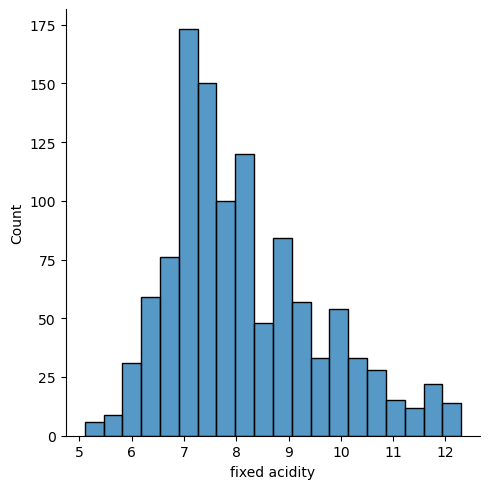

<Figure size 1000x800 with 0 Axes>

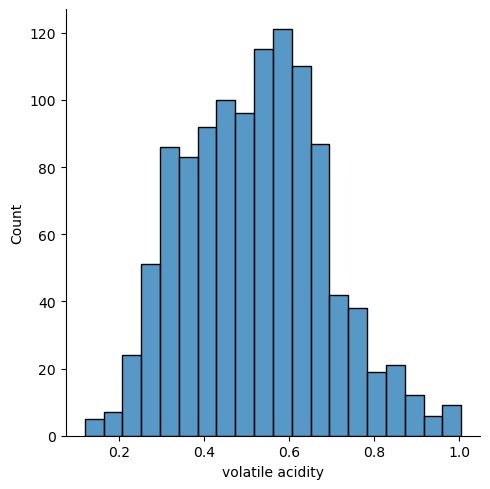

<Figure size 1000x800 with 0 Axes>

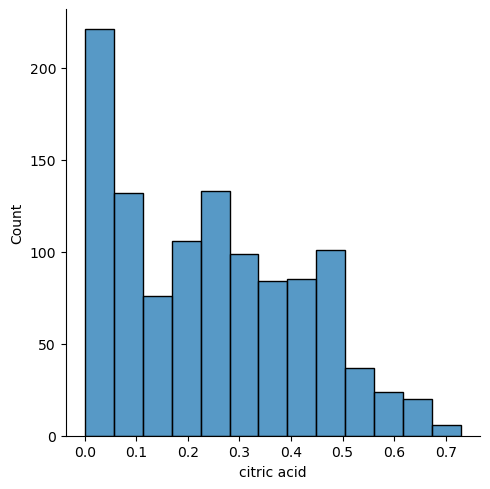

<Figure size 1000x800 with 0 Axes>

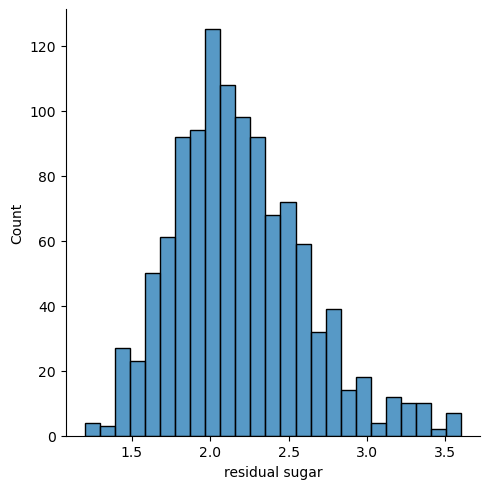

<Figure size 1000x800 with 0 Axes>

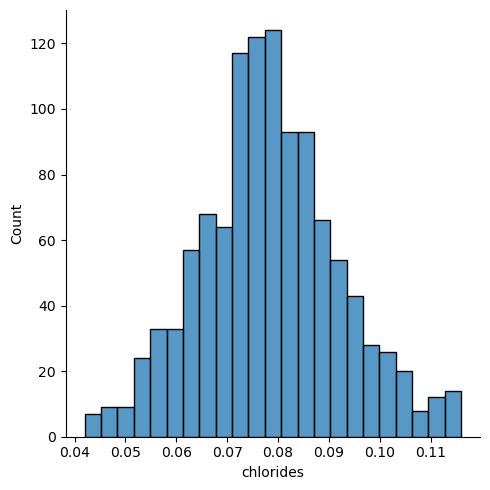

<Figure size 1000x800 with 0 Axes>

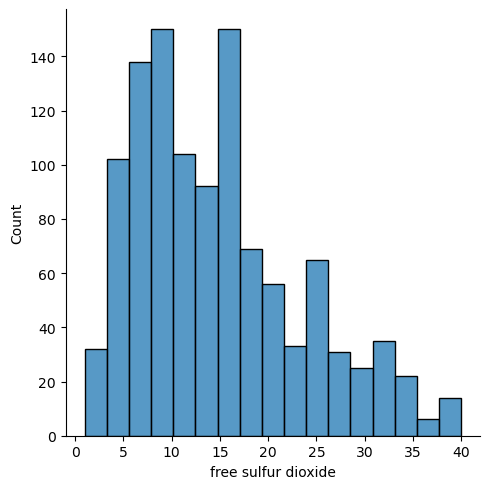

<Figure size 1000x800 with 0 Axes>

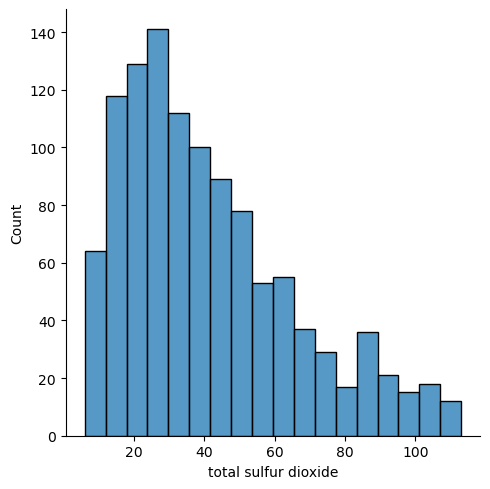

<Figure size 1000x800 with 0 Axes>

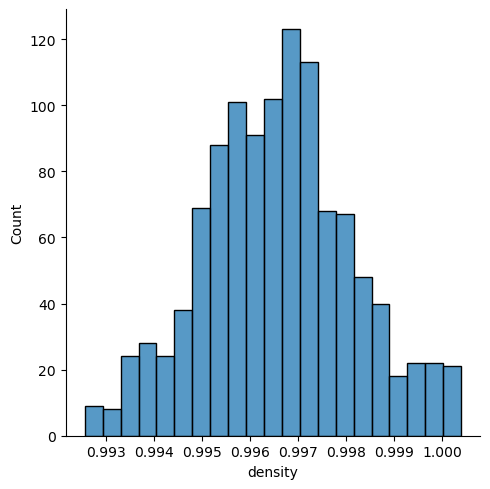

<Figure size 1000x800 with 0 Axes>

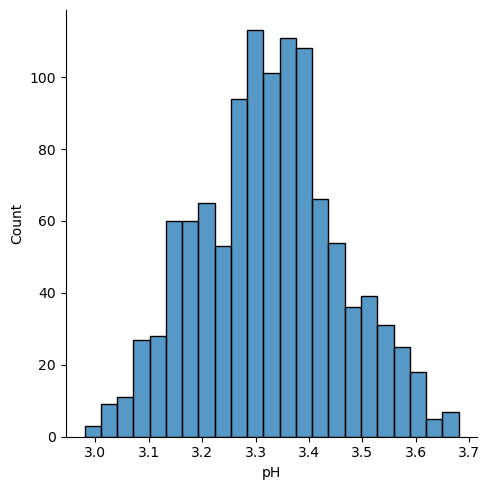

<Figure size 1000x800 with 0 Axes>

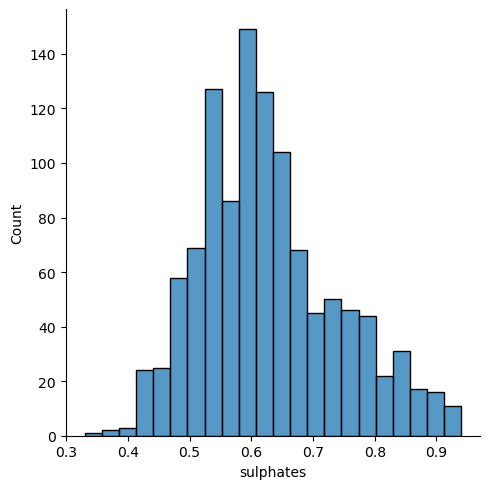

<Figure size 1000x800 with 0 Axes>

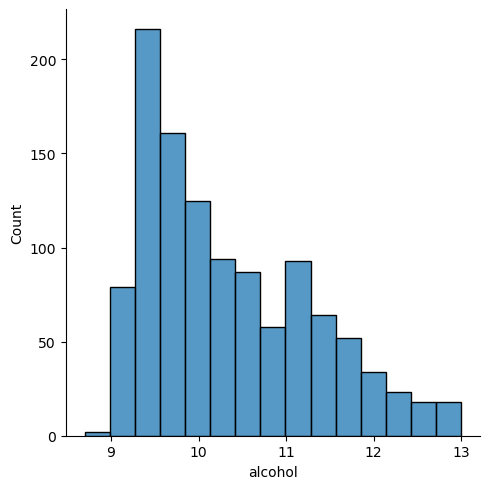

In [8]:
for i in x.columns:
    plt.figure(figsize=(10, 8))
    sns.displot(data = x, x = x[i], kind = 'hist')

    

In [9]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')

x_transform = power.fit_transform(x)
x_transform1=pd.DataFrame(x_transform)
x_transform1

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,0,1,2,3,4,5,6,7,8,9,10
0,-0.422398,1.077258,-1.508908,-0.592165,-0.146627,-0.265609,-0.060699,0.0,1.400960,-0.552359,-1.112098
1,-0.093744,2.015872,-1.508908,0.994245,1.402303,1.165427,1.085724,0.0,-0.965414,0.567154,-0.482063
2,-0.093744,1.400484,-1.204608,0.379575,0.993029,0.243119,0.706777,0.0,-0.492140,0.311943,-0.482063
3,1.787759,-1.557035,1.586985,-0.592165,-0.220274,0.459329,0.890169,0.0,-1.285244,-0.346341,-0.482063
4,-0.422398,1.077258,-1.508908,-0.592165,-0.146627,-0.265609,-0.060699,0.0,1.400960,-0.552359,-1.112098
...,...,...,...,...,...,...,...,...,...,...,...
1119,-1.642875,0.512957,-0.917887,-0.330147,0.854460,1.649523,0.359493,0.0,0.957750,-0.346341,0.376586
1120,-2.018802,0.217764,-0.780607,0.154693,-1.204881,2.055978,0.608634,0.0,1.474173,1.179983,1.009315
1121,-1.524848,-0.025161,-0.581770,0.379575,-0.146627,1.453433,0.201965,0.0,0.733576,1.108334,0.847127
1122,-2.018802,0.771032,-0.647133,-0.330147,-0.220274,1.649523,0.359493,0.0,1.837481,0.807937,0.041289


C:\Users\ravin\AppData\Local\Temp\ipykernel_4640\2406511261.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

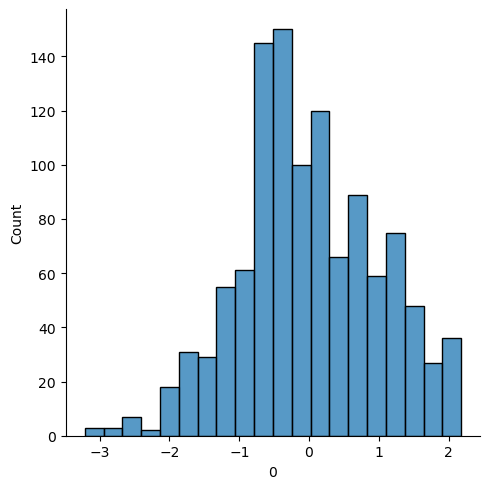

<Figure size 1000x800 with 0 Axes>

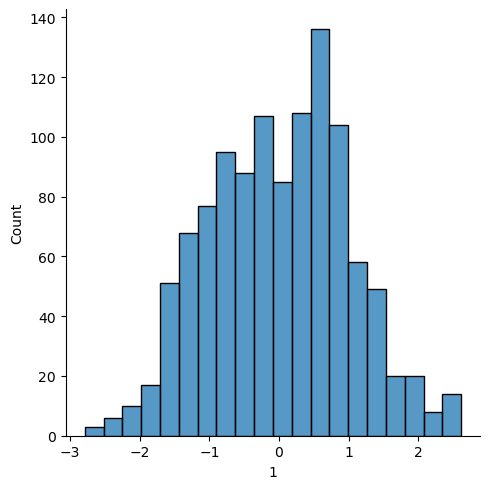

<Figure size 1000x800 with 0 Axes>

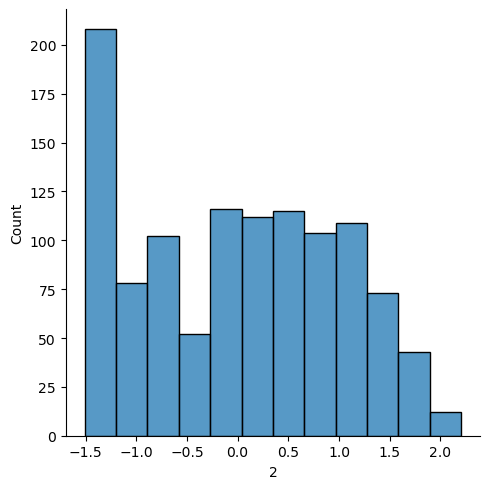

<Figure size 1000x800 with 0 Axes>

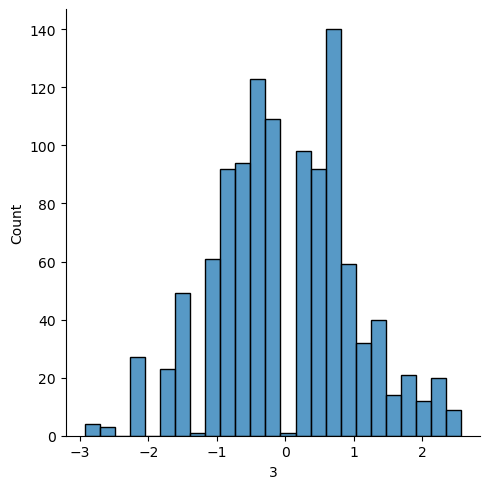

<Figure size 1000x800 with 0 Axes>

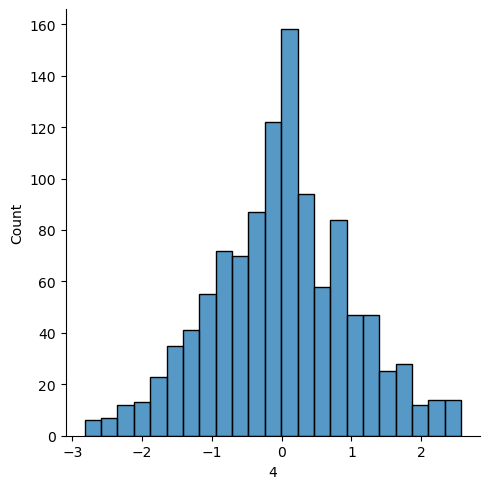

<Figure size 1000x800 with 0 Axes>

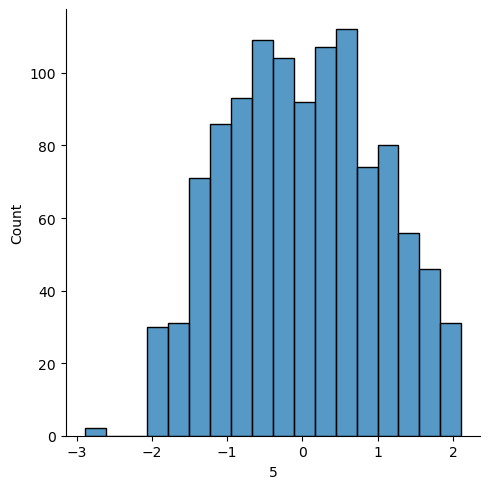

<Figure size 1000x800 with 0 Axes>

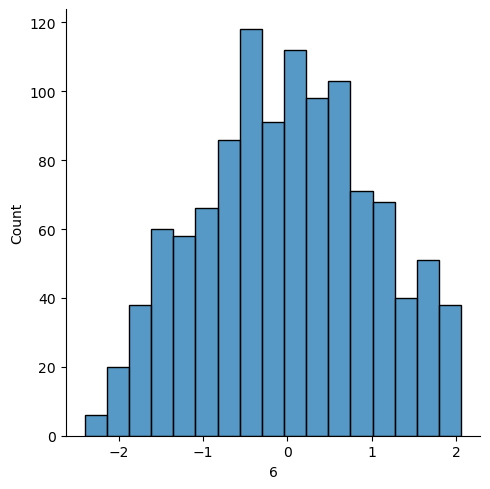

<Figure size 1000x800 with 0 Axes>

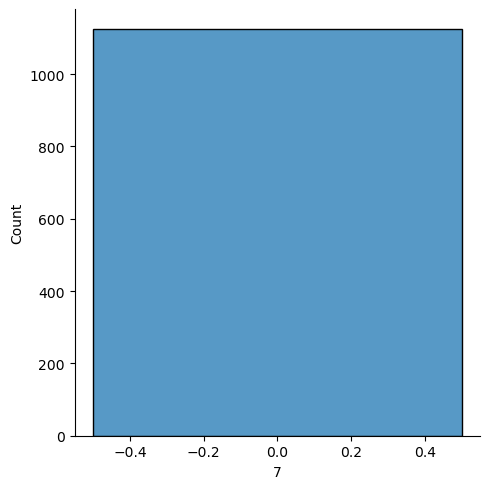

<Figure size 1000x800 with 0 Axes>

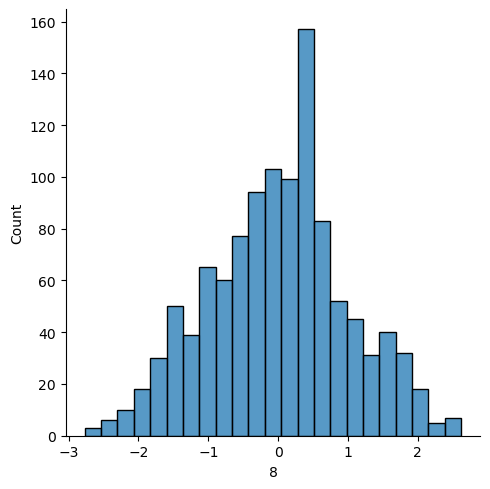

<Figure size 1000x800 with 0 Axes>

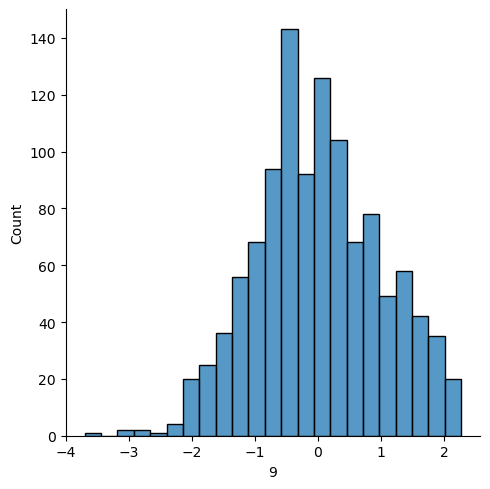

<Figure size 1000x800 with 0 Axes>

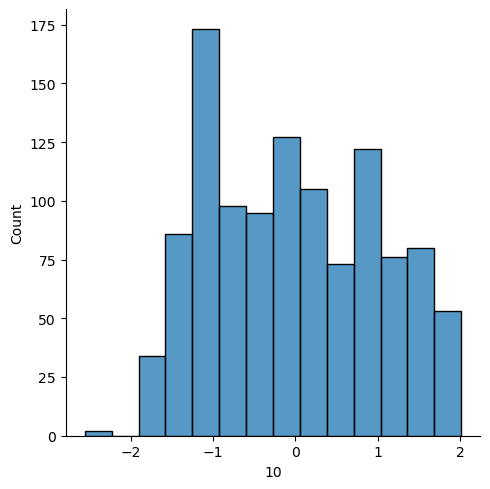

In [10]:
for i in x_transform1.columns:
    plt.figure(figsize=(10, 8))
    sns.displot(data = x_transform1, x = x_transform1[i], kind = 'hist')

# Standard Scaler

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
X_scaled = scale.fit_transform(x_transform1)
X_scaled1 = pd.DataFrame(X_scaled)

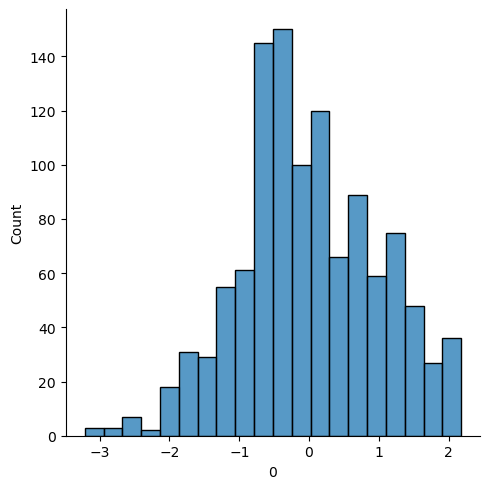

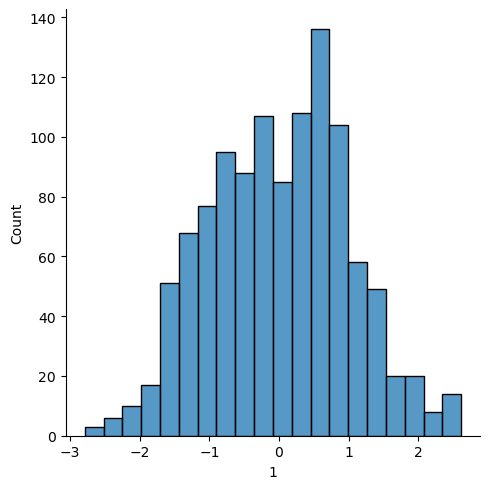

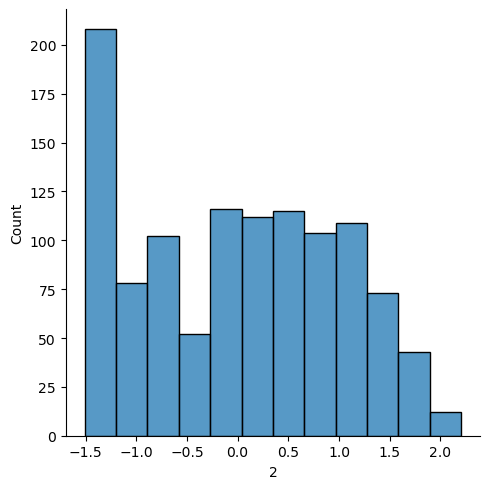

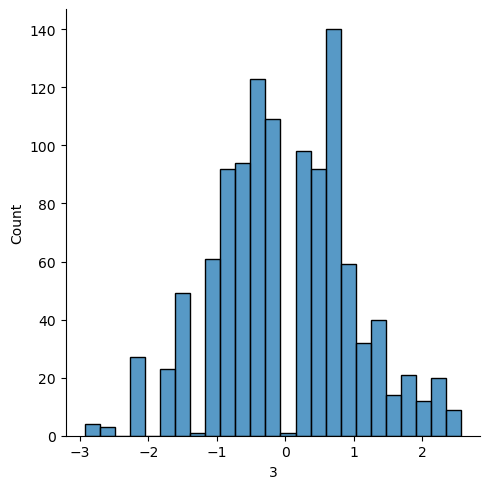

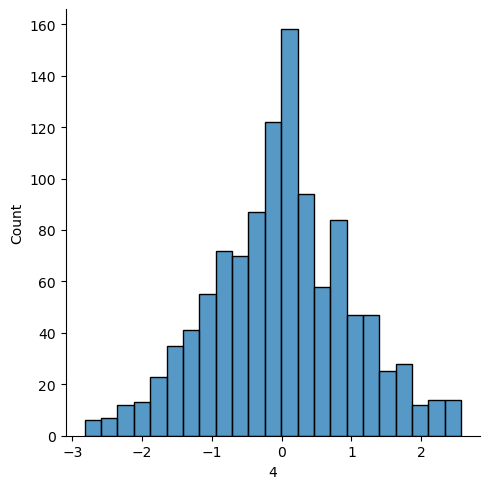

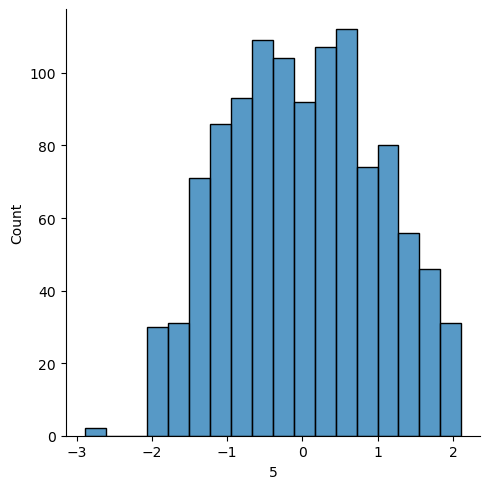

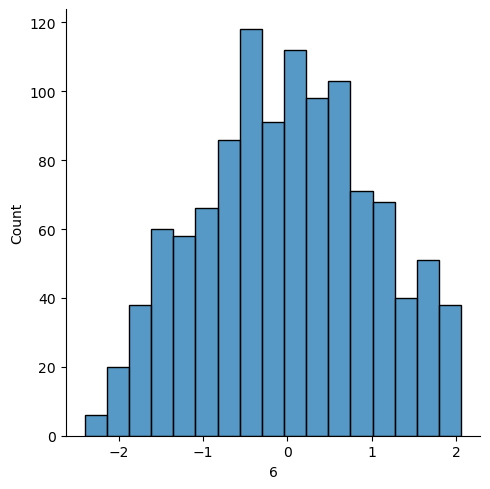

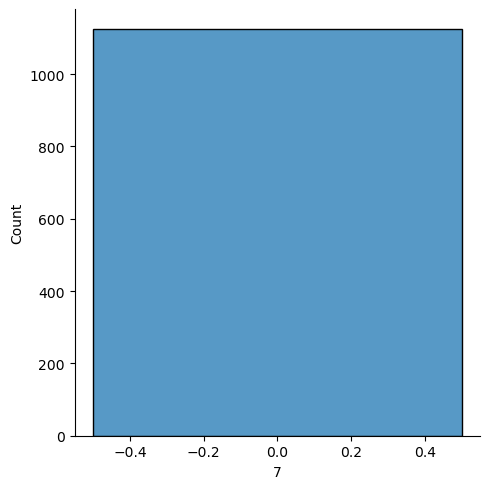

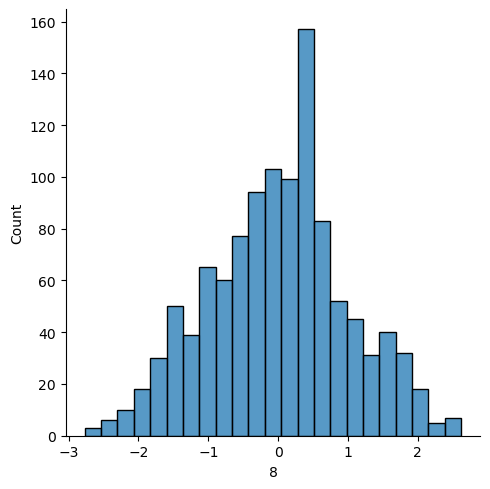

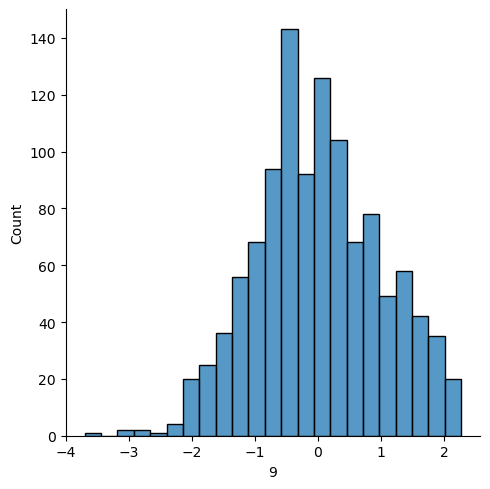

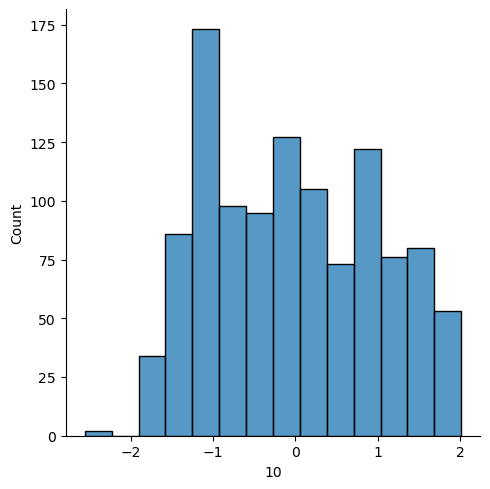

In [14]:
for i in X_scaled1.columns:
    sns.displot(x = X_scaled1[i], kind='hist')
    

In [1]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled1 , y1, test_size = 0.20, random_state = 44)

NameError: name 'train_test_split' is not defined

# Logistic Regression

In [16]:
logistic = LogisticRegression()

logistic.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_predict = logistic.predict(x_train)

In [18]:
score = accuracy_score(y_predict, y_train)
score

0.8976640711902113

In [19]:
y_test_pred = logistic.predict(x_test).tolist()

In [20]:
score = accuracy_score(y_test_pred, y_test)
score

0.92

# ERROR


<AxesSubplot:xlabel='quality', ylabel='Density'>

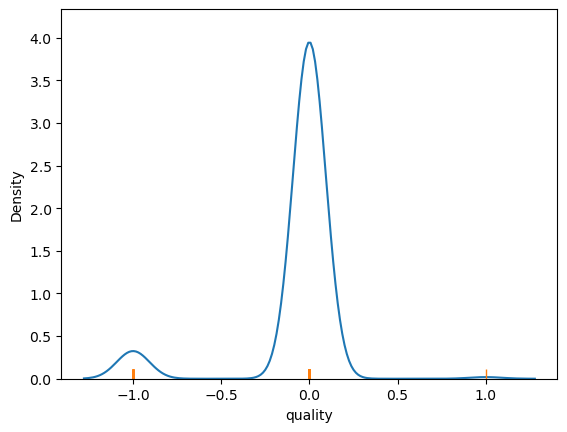

In [21]:
Error = y_test_pred - y_test
Error.value_counts()
sns.kdeplot(x = Error)
sns.rugplot(x= Error)

# Random Classifier 

In [22]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [23]:
Classifier = RandomForestClassifier()

In [24]:
Classifier.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
Y_pre_train = Classifier.predict(x_train)

In [26]:
score = confusion_matrix(Y_pre_train, y_train )
score

array([[797,   0],
       [  0, 102]], dtype=int64)

In [31]:
score = accuracy_score(Y_pre_train, y_train )
score

1.0

In [27]:
result = Y_pre_train - y_train
result.value_counts()

0    899
Name: quality, dtype: int64

<AxesSubplot:ylabel='Density'>

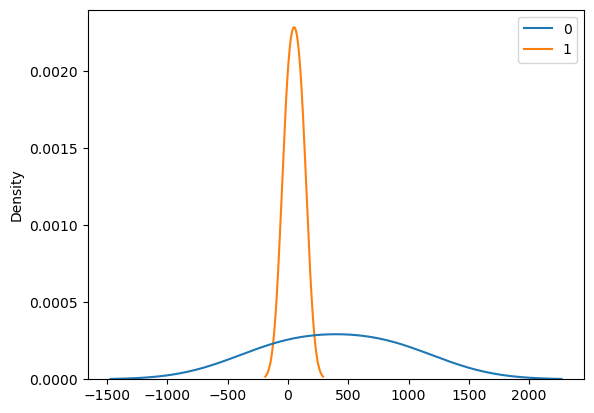

In [28]:
sns.kdeplot(data = score)

# Test 

In [32]:
y_test_pred = Classifier.predict(x_test)

In [34]:
score1 = accuracy_score(y_test_pred , y_test)*100
score1

92.44444444444444

# hyperparamerter 

In [47]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}


In [61]:
para = GridSearchCV(estimator = Classifier,
                    param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 5,
                   verbose = 0)
para

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [62]:
para.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [68]:
best=para.best_params_
best

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [71]:
Classifier_i = RandomForestClassifier(criterion = 'entropy',
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)

In [72]:
Classifier_i.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=200)

In [74]:
Y_pre_train1 = Classifier_i.predict(x_train)

In [75]:
score = accuracy_score(Y_pre_train1, y_train )
score

0.9955506117908788

In [76]:
y_test_pred1 = Classifier_i.predict(x_test)

In [77]:
score1 = accuracy_score(y_test_pred1 , y_test)*100
score1

92.44444444444444